# DS 3001: Analysis of Smoking Cigarettes and CHD Risk - Michelle Kim and Cara Seely

## Summary
This project looks to answer the question of how coronary heart disease (CHD) risk and other related health factors vary among smokers and non-smokers, using the Framingham Heart study dataset. The data set comprises various health indicators of patients at the time of their appointment. This analysis focuses on understanding how smoking behaviors affect the likelihood of developing CHD. The variables being used in this analysis include: sex, age, current smoking status, cigarettes smoked per day, systolic blood pressure, diastolic blood pressure, total cholesterol, BMI (Body Mass Index), and ten-year risk of coronary heart disease. These variables are believed to have the most abundance of data to give insights about the risk of developing CHD. The data within these variables were cleaned before conducting analysis, which is featured later in this paper. After cleaning, each variable was analyzed and turned into various visualizations. These visualizations consist of kernel density plots, histograms, and boxplots which display varying distributions of the data. Analysis of our question yields that there is no significant correlation between these specific health indicators and smoker’s risk of developing coronary heart disease within the next 10 years. In certain instances, non-smokers showed worse signs of health, but this cannot be a generalized statement due to the data’s low r-squared values.

In [ ]:
! git clone https://www.github.com/carascott/project_chd

fatal: destination path 'project_chd' already exists and is not an empty directory.


## Data

This part of the paper is dedicated to explaining the data and key variables in the analysis, as well as the data cleaning methods that went along in this project. Before beginning cleaning, the data was read by first importing necessary libraries. Having to work and set up the two csv files (train and test) were initially troubling, but we wrote code for a simple data preprocessing workflow. It involves replacing missing values in both training and test datasets with the mean of respective columns using SimpleImputer. The features are then standardized by removing the mean and scaling to unit variance using StandardScaler, ensuring consistent data distribution across training and testing. Feature variables are isolated from the target variable 'TenYearCHD' before applying transformations to prevent data leakage and maintain the integrity of the model's training process. Finally, the target variable 'TenYearCHD' is extracted from both datasets to use as labels for training and testing the model.

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
# Loading the data and dividing the dataset into a training set to train and a testing set to evaluate the model.
test = pd.read_csv('project_chd/fhs_test.csv')
train = pd.read_csv('project_chd/fhs_train.csv')

# Data preprocessing
# Missing values in the datasets are replaced with the mean of the respective columns
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

x_train = imputer.fit_transform(train.drop('TenYearCHD', axis=1))
x_test = imputer.transform(test.drop('TenYearCHD', axis=1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_train = train['TenYearCHD']
y_test = test['TenYearCHD']

Printing the columns of both datasets to ensure familarity with the structure of the dataset before beginning work.

In [ ]:
print(train.columns)

Index(['Unnamed: 0', 'sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [ ]:
print(test.columns)

Index(['Unnamed: 0', 'sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [ ]:
print(train)

      Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0           1267    1   58        1.0              0         0.0     0.0   
1           1209    0   40        1.0              1        15.0     0.0   
2           2050    0   52        1.0              0         0.0     0.0   
3           1183    1   38        2.0              1        43.0     0.0   
4           3225    0   43        1.0              0         0.0     0.0   
...          ...  ...  ...        ...            ...         ...     ...   
3175        1411    1   36        4.0              0         0.0     0.0   
3176         262    1   47        1.0              1        20.0     0.0   
3177        1459    1   52        2.0              0         0.0     0.0   
3178         733    0   48        1.0              1         5.0     0.0   
3179         691    0   60        2.0              1        15.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0       

In [ ]:
print(test)

      Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0            674    0   58        1.0              1        20.0     0.0   
1           4070    0   51        3.0              0         0.0     0.0   
2           3150    0   44        2.0              1         9.0     0.0   
3           1695    0   40        2.0              1        20.0     0.0   
4           2692    1   58        2.0              1        20.0     0.0   
...          ...  ...  ...        ...            ...         ...     ...   
1055        3075    0   63        2.0              0         0.0     0.0   
1056        1232    1   42        4.0              0         0.0     0.0   
1057        3730    1   63        3.0              0         0.0     0.0   
1058        2480    0   55        3.0              0         0.0     0.0   
1059         115    0   41        1.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0       

Starting with the ‘sex’ column, which initially contained the numeric codes of 0 and 1,  was converted to the string values of ‘Female’ and ‘Male'. This conversion from numerical to categorical was deemed necessary because although many algorithms in model-making require numerical inputs, to visualize the sex
component from this data and for readability for users, this was a necessary change.


In [ ]:
# Cleaning sex column
train['sex'] = train['sex'].replace({0: 'Female', 1: 'Male'})

Next, is the ‘cigsPerDay’ column, where missing entries are being filled with zeros. We decided to assume that missing values correspond to non-smokers to avoid gaps in the data that reduce the power of our models.

In [ ]:
# Cleaning cigs per day column
train['cigsPerDay'].fillna(0, inplace=True)

/var/folders/r7/8yfx5p116t50w33dph81nh4c0000gn/T/ipykernel_19559/3314132952.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['cigsPerDay'].fillna(0, inplace=True)


We repeated this cleaning with the ‘currentSmoker’ column, in which we instead converted 1 to ‘Yes’ and 0 to ‘No’. Again, this was to get rid of the numerical data that is difficult to interpret.

In [ ]:
# Cleaning current smoker column
train['currentSmoker'] = train['currentSmoker'].replace({1: 'Yes', 0: 'No'})

The ‘TenYearCHD’, is our target variable that is a measure of 10 year risk of CHD. We converted this variable into from binary numerical format to categorical 'Yes'/'No', to display if an individual was identified with the risk of developing this disease.


In [ ]:
# Cleaning Ten-Year CHD
train['TenYearCHD'] = train['TenYearCHD'].replace({1: 'Yes', 0: 'No'})

In the ‘BMI’ column, we got rid of any values over 40. This threshold was set based on the medical standard that says a BMI over 40 is considered severe obesity. This cap is intended to remove excessively large values, as they can be outliers. This smaller range creates a study that is more representative of the population. This is because the majority of patients’ BMIs fell into this range, but few outliers fell out, skewing the distribution of data in the visualization process to the left. Excessively large values of BMI were removed to maintain a more detailed graph. Obesity is typically seen within BMIs of 30-40. Beyond this value represents special cases of a patient’s BMI and does not encapsulate the bigger picture.

In [ ]:
# Cleaning BMI
train = train[train['BMI'] <= 40]
# Removing excessively large BMIs. A BMI of 30-40 is considered obese, so
# limiting the data allows for an easier visualization without eliminating
# a certain group or parameter.

Similarly as with the ‘BMI’ column, the ‘totChol’ column eliminated the highest values to prevent outliers. This column name indicates ‘total cholesterol'. Cholesterol levels exceeding a very high value are statistically rare and could cause potential issues with data analysis. Patient total cholesterol above 450 mg/dL was filtered from this data set due to the skewed distribution of extenuating circumstances.

In [ ]:
# Cleaning total cholesterol
train = train[train['totChol'] <= 450]

In [ ]:
for column_name in train.columns.tolist():
    print(column_name)
# sex (CATEGORICAL)
# age (CATEGORICAL)
# education (CATEGORICAL)
# currentSmoker (CATEGORICAL)
# cigsPerDay (NUMERIC)
# BPMeds (CATEGORICAL)
# prevalentStroke (CATEGORICAL)
# prevalentHyp (CATEGORICAL)
# diabetes  (CATEGORICAL)
# totChol (NUMERIC)
# sysBP (NUMERIC)
# diaBP (NUMERIC)
# BMI (NUMERIC)
# heartRate (NUMERIC)
# glucose (NUMERIC)
# TenYearCHD (CATEGORICAL)

Unnamed: 0
sex
age
education
currentSmoker
cigsPerDay
BPMeds
prevalentStroke
prevalentHyp
diabetes
totChol
sysBP
diaBP
BMI
heartRate
glucose
TenYearCHD


These data cleaning steps are crucial, as they enhance our data quality. By addressing missing values, converting categorical variables, and eliminating outliers, this sets a good foundation for our data analysis. With the properly cleaned data, we can create accurate and interpretable models.

## Results

The first analysis of our data included understanding who the smokers are. The number of men who don’t smoke is almost equal to the number of females who do smoke. A patient from this study who is a current smoker at the time of data collection is more likely to be male, despite men comprising 45% of respondents.

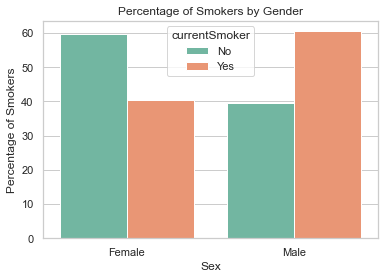

In [ ]:
# Assessing WHO the current smokers are by Sex
sns.set(style="whitegrid")
smoker_counts = train.groupby(['sex', 'currentSmoker']).size().reset_index(name='count')
total_counts = train.groupby('sex').size().reset_index(name='total')
merge = smoker_counts.merge(total_counts, on='sex')
merge['Smoker percentage'] = (merge['count'] / merge['total']) * 100

sns.barplot(data=merge, x='sex', y='Smoker percentage', hue='currentSmoker', palette="Set2")
plt.xlabel('Sex')
plt.ylabel('Percentage of Smokers')
plt.title('Percentage of Smokers by Gender')
plt.show()

When distributed by age, using bins 25-75 increasing by intervals of 10, the majority of smokers are under the age of 50, peak density being around 40 years of age. It is also important to note that the densest age of patients in this study are around 40 years old. The percentage of those who are smokers becomes nearly 50/50 within the 45-55 year old age group. Patients 55+ years old show a decline in smoking prevalence.

/var/folders/r7/8yfx5p116t50w33dph81nh4c0000gn/T/ipykernel_19559/2664102660.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoker_counts_by_age = train.groupby(['age_group', 'currentSmoker']).size().reset_index(name='count')
/var/folders/r7/8yfx5p116t50w33dph81nh4c0000gn/T/ipykernel_19559/2664102660.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts_by_age = train.groupby('age_group').size().reset_index(name='total')


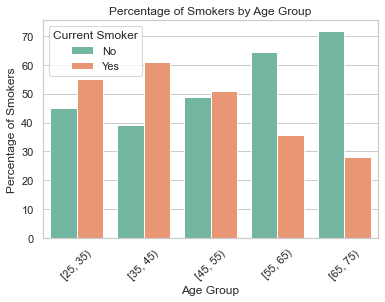

In [ ]:
train['age_group'] = pd.cut(train['age'], bins=[25, 35, 45, 55, 65, 75], right=False)

# Calculate the smoker counts by age group
smoker_counts_by_age = train.groupby(['age_group', 'currentSmoker']).size().reset_index(name='count')
total_counts_by_age = train.groupby('age_group').size().reset_index(name='total')

# Merge the counts
merge_by_age = smoker_counts_by_age.merge(total_counts_by_age, on='age_group')
merge_by_age['Smoker percentage'] = (merge_by_age['count'] / merge_by_age['total']) * 100

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
sns.barplot(data=merge_by_age, x='age_group', y='Smoker percentage', hue='currentSmoker', palette="Set2")
plt.xlabel('Age Group')
plt.ylabel('Percentage of Smokers')
plt.title('Percentage of Smokers by Age Group')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.legend(title='Current Smoker')
plt.show()

The graph below illustrates BMI distributions in relation to the risk of developing Coronary Heart Disease (CHD) over ten years, distinguishing between individuals at risk and not at risk. It shows that those at risk of CHD tend to have higher BMI values, as indicated by the broader and right-shifted distribution for the 'Yes' group. The 'No' risk group peaks at a lower BMI, suggesting a concentration of lower BMI values among those not at risk. Overall, the graph implies a correlation between higher BMI and increased risk of CHD.

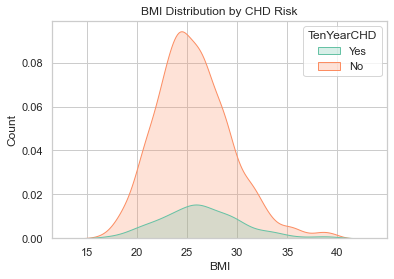

In [ ]:
# Assessing WHO the patients are with ten-year risk of developing CHD :
sns.kdeplot(data=train, x='BMI', hue="TenYearCHD", palette="Set2", fill=True)
plt.title('BMI Distribution by CHD Risk')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

This next graph represents the total cholesterol levels distributed across two groups: individuals with a risk of developing Coronary Heart Disease (CHD) in ten years ('Yes') and those without ('No'). The distribution for both groups peaks around the same cholesterol level, indicating that average total cholesterol may not differ significantly between those at risk and not at risk. However, the distribution for the at-risk group is slightly broader, suggesting more variability in cholesterol levels among those individuals.

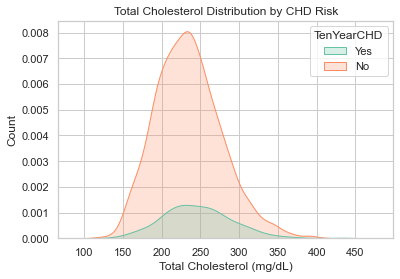

In [ ]:
sns.kdeplot(data=train, x='totChol', hue="TenYearCHD", palette="Set2", fill=True)
plt.title('Total Cholesterol Distribution by CHD Risk')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('Count')
plt.show()

When comparing the number of cigarettes smoked per day and systolic blood pressure by CHD risk, there is a general (but not significant) decrease in systolic blood pressure as the number of cigarettes smoked per day increases. Patients identified with the risk of developing CHD were seen higher in the graph (higher systolic blood pressure), but CHD risk is spread randomly throughout the graph and exhibits no pattern.

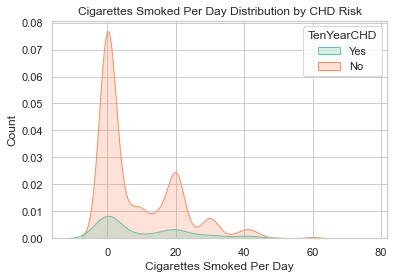

In [ ]:
sns.kdeplot(data=train, x='cigsPerDay', hue="TenYearCHD", palette="Set2", fill=True)
plt.title('Cigarettes Smoked Per Day Distribution by CHD Risk')
plt.xlabel('Cigarettes Smoked Per Day')
plt.ylabel('Count')
plt.show()

When comparing patient age, BMI, and current smoking status, smokers (orange dots) concentrate mostly to the bottom left, while non-smokers concentrate mostly to the top right. In other words, age and BMI tend to increase with one another. The non-smokers are clustered with lower age and BMI, while smokers are clustered with higher age and BMI, which could be due to the majority of smokers in this data being within an older demographic anyway. It is important to note that the graph does not display a clear pattern. However, this analysis reaffirms that BMI is lower in smokers than non-smokers. A potential explanation of this could be due to appetite suppression caused by smoking tobacco, which may cause the patient to maintain a lower BMI.

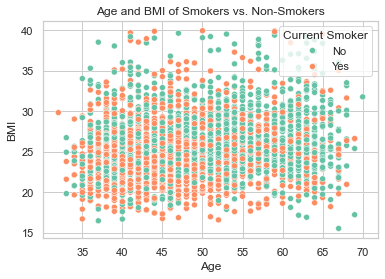

In [ ]:
# Age, BMI, & Current Smoker
sns.scatterplot(data=train, x='age', y='BMI', hue="currentSmoker", palette="Set2")
plt.title('Age and BMI of Smokers vs. Non-Smokers')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Current Smoker')
plt.show()

This graph appears to show that systolic blood pressure varies widely among individuals regardless of the number of cigarettes smoked per day and is also spread across individuals with different CHD risk levels. There is no clear trend or correlation visible from the graph that higher cigarette consumption leads to higher systolic blood pressure or a higher risk of CHD. The only slight pattern visible is the number of cigarettes smoked per day increases as systolic blood pressure decreases. This could suggest that while smoking is a risk factor for CHD, its direct relationship with systolic blood pressure and CHD risk in this particular dataset is not straightforward and may be influenced by other factors.

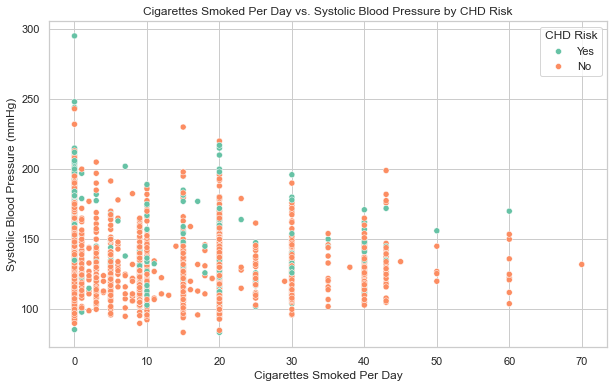

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cigsPerDay', y='sysBP', hue='TenYearCHD', data=train, palette="Set2")
plt.title('Cigarettes Smoked Per Day vs. Systolic Blood Pressure by CHD Risk')
plt.xlabel('Cigarettes Smoked Per Day')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.legend(title='CHD Risk')
plt.show()

The linear regression model applied for CHD risk classification shows high confidence in its predictions, primarily identifying the no-risk cases with a high number of true negatives but performing poorly in detecting high-risk cases, as indicated by a low number of true positives and a high number of false negatives. The model's conservative nature results in fewer false positives, yet the high rate of false negatives is extremely deterring.

Linear Regression Accuracy: 0.8547169811320755
Linear Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       903
           1       0.71      0.03      0.06       157

    accuracy                           0.85      1060
   macro avg       0.78      0.51      0.49      1060
weighted avg       0.83      0.85      0.79      1060

Linear Regression R^2: 0.09038299151652152


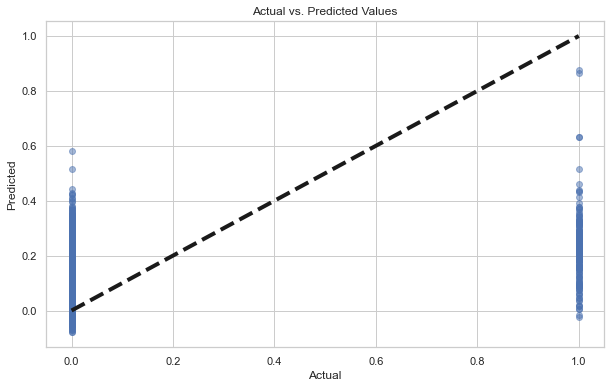

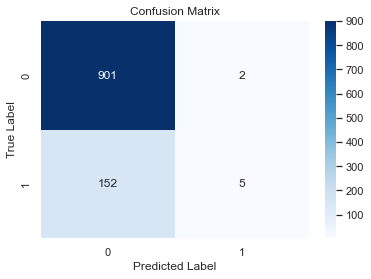

In [ ]:
# Fit model, predict and calculate R^2
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred_lin_reg = lin_reg.predict(x_test)
y_pred_lin_reg_class = [1 if x >= 0.5 else 0 for x in y_pred_lin_reg]
r_squared = lin_reg.score(x_test, y_test)

# Print accuracy and classification report
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_lin_reg_class))
print("Linear Regression Classification Report:\n", classification_report(y_test, y_pred_lin_reg_class))
print("Linear Regression R^2:", r_squared)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin_reg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_lin_reg_class)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The KNN confusion matrix indicates that while the model is proficient at predicting the negative class (0), with 877 true negatives and only 26 false positives, it struggles with the positive class (1). The classification report heatmap shows a high recall for the negative class but much worse performance for the positive class, leading to an overall moderate f1-score. This indicates that it's better at identifying the absence of the condition rather than its presence.

KNN Accuracy: 0.8433962264150944
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       903
           1       0.40      0.11      0.17       157

    accuracy                           0.84      1060
   macro avg       0.63      0.54      0.54      1060
weighted avg       0.79      0.84      0.80      1060



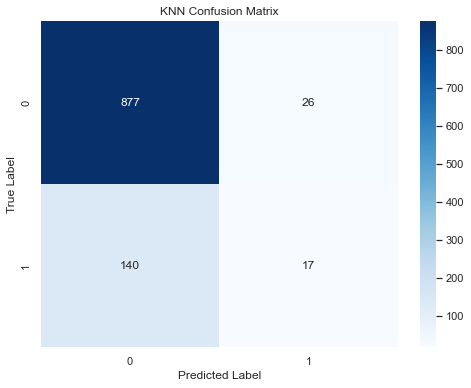

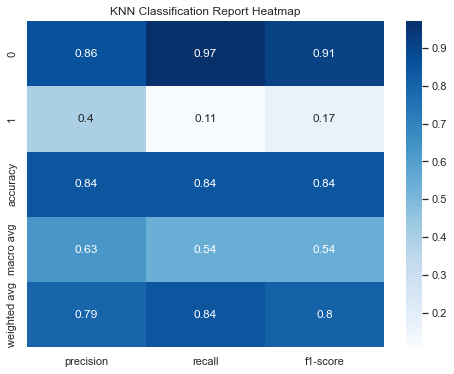

In [ ]:
# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

# Print classification report
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
conf_mat = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN Confusion Matrix')
plt.show()

# Plot classification report
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pd.DataFrame(knn_class_report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('KNN Classification Report Heatmap')
plt.show()

The Decision Tree model is good at identifying individuals without CHD risk but often fails to correctly detect those at risk, leading to many missed cases. The overall accuracy for predicting CHD risk is skewed by its effectiveness in recognizing non-risk cases while struggling with the accurate detection of actual risk cases.

Decision Tree Accuracy: 0.8452830188679246
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       903
           1       0.33      0.04      0.08       157

    accuracy                           0.85      1060
   macro avg       0.59      0.51      0.50      1060
weighted avg       0.78      0.85      0.79      1060



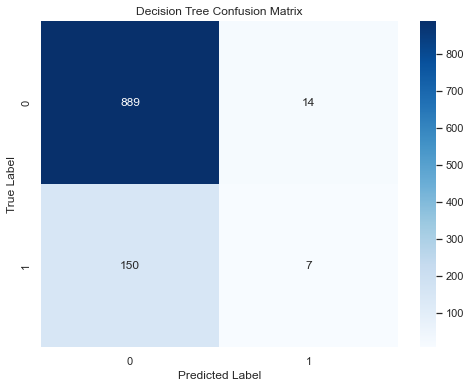

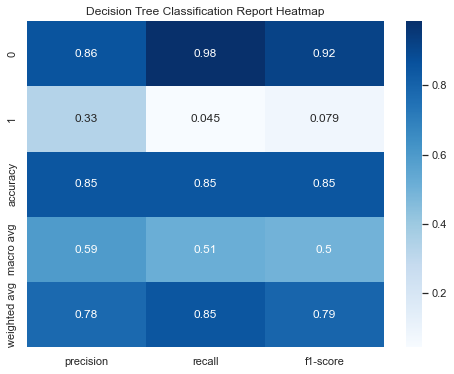

In [ ]:
# Fit the Decision Tree model
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)

# Calculate accuracy
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", tree_accuracy)

# Print classification report
tree_class_report = classification_report(y_test, y_pred_tree, output_dict=True)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
conf_mat_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_mat_tree, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Plot classification report heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pd.DataFrame(tree_class_report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Decision Tree Classification Report Heatmap')
plt.show()

## Conclusion

In conclusion, our data analysis project aimed to explore the relationship between lifestyle and health factors with the risk of Coronary Heart Disease (CHD), with a focus on smokers and non-smokers. Through a series of statistical models, visualizations, and predictions, we gained insight into this dataset. We looked into how age, sex Body Mass Index (BMI), cholesterol levels, smoking habits, and blood pressure correlate with CHD risk. These variables were selected from the study dataset, as they are believed to have the largest impact on CHD risk.

Overall, the findings from our analysis showed a moderate correlation. The BMI distribution highlighted that individuals at higher risk for CHD tend to have higher BMI values, pointing towards obesity as a significant risk factor. However, cholesterol levels did not demonstrate a clear separation between risk groups, suggesting that cholesterol alone may not be a definitive indicator of CHD risk within our dataset (there is also no distinguishment in this data of 'good' and 'bad' cholesterol). The smoking analysis did not reinforce the theory that tobacco use and CHD are correlated, showing a higher prevalence and intensity of not-smoking among those identified with the risk. Moreover, the analysis of smoking in conjunction with lower systolic blood pressure did display a clear relationship, which could indicate that CHD risk can not be modeled simply and has a complex relationship when being compared to various factors.   

Our project used linear regression and K-Nearest Neighbors (KNN) models, alongside a Decision Tree classifier, each bringing different perspectives on the data. The linear regression model was used to identify any potential trends. It has a low r squared value, making it very limited in giving insights, however it showed high accuracy for negative predictions. The model is good at identifying those who are not at risk of CHD, but not so much with identifying patients that are at-risk. Similarly with the KNN model and the Decision Tree classifier, they  showed high accuracy for negative predictions but a large number of false negatives for CHD risk.

Although the predictive models do not show strong reliability, this project leverages the Framingham Heart study dataset, which is a reputable and extremely informative document. With this data and analysis, this project does indeed provide empirical insights about the health conditions associated with coronary heart disease. By using statistical data and a range of numerous variables, this project does shed some light on the relationship between CHD risk and smoking cigarettes. While acknowledging that the cause of CHD is complex, this project still utilizes a diverse population using statistical methods and various factors.

Due to the scope of this project, there are aspects of CHD risk factors that were unable to be explored. A long-term research could give deeper insights and allow us to see how CHD risk changes over time. Additional work could also include focusing on another demographic, as this project focused on smokers and non-smokers. The lack of an identified correlation from our hypothesis implies that there are other health indicators that were not documented in this study for the decreased health of smokers. Nonetheless, our project gives a deeper understanding of CHD risks associated with certain lifestyle and health factors.
